In [1]:
import pandas as pd
import numpy as np

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import gensim.downloader as api
import string
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.stem.porter import *


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten, Input, Bidirectional, Activation
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving test_df.csv to test_df.csv
Saving entrenamiento_df.csv to entrenamiento_df.csv


In [5]:
entrenamiento_df = pd.read_csv('entrenamiento_df.csv')
test_df = pd.read_csv('test_df.csv')

In [6]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punc(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [9]:
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

def unslang(text):
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

In [10]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

stemmer = PorterStemmer()

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

In [11]:
for datas in [entrenamiento_df, test_df]:
    datas['cleaned_text'] = datas['text'].apply(lambda x : remove_url(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : remove_html(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : remove_emoji(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : unslang(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : remove_punc(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : tokenization(x.lower()))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : remove_stopwords(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : stemming(x))
    datas['cleaned_text'] = datas['cleaned_text'].apply(lambda x : ' '.join(x))

entrenamiento_df

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 peopl receiv wildfir evacu order califor...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrari thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,polic investig ebik collid car littl portug eb...


In [12]:
test_df

,id,keyword,location,text,cleaned_text
0,0,NaN,NaN,Just happened a terrible car crash,happen terribl car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond gees flee across street ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalyps light spokan wildfir
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquak safeti lo angel ûò safeti fasten xrwn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri wors last hurrican cityamp3oth hardes...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derail chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issu hazard weather outlook hwo


In [13]:
# Creo un diccionario de palabras para poder contar las palabras
dic_palabras = {}
for texto in entrenamiento_df['cleaned_text']:
  for elem in texto.split():
    dic_palabras[elem] = 1
for texto in test_df['cleaned_text']:
  for elem in texto.split():
    dic_palabras[elem] = 1
vocab_size = len(dic_palabras) + 1
vocab_size

18487

In [14]:
# A cada palabra del texto le asigno un número fijo
train_encoded = [one_hot(texto, vocab_size) for texto in entrenamiento_df['cleaned_text']]
test_encoded = [one_hot(texto, vocab_size) for texto in test_df['cleaned_text']]

In [15]:
max_len = 1
for texto in entrenamiento_df['cleaned_text']:
  if (max_len < len(texto.split())):
    max_len = len(texto.split())
max_len

25

In [16]:
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

In [17]:
y = entrenamiento_df['target']

In [18]:
batch_size = 100
embedding_dims = 10
filters = 16
kernel_size = 3
hidden_dims = 250
epochs = 10

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(train_padded, y, batch_size=batch_size, epochs=epochs)

Epoch 1/10
77/77 [==============================] - 1s 8ms/step - loss: 0.6787 - accuracy: 0.5703
Epoch 2/10
77/77 [==============================] - 1s 8ms/step - loss: 0.5613 - accuracy: 0.7164
Epoch 3/10
77/77 [==============================] - 1s 8ms/step - loss: 0.4139 - accuracy: 0.8231
Epoch 4/10
77/77 [==============================] - 1s 8ms/step - loss: 0.3445 - accuracy: 0.8595
Epoch 5/10
77/77 [==============================] - 1s 8ms/step - loss: 0.2862 - accuracy: 0.8862
Epoch 6/10
77/77 [==============================] - 1s 9ms/step - loss: 0.2618 - accuracy: 0.8937
Epoch 7/10
77/77 [==============================] - 1s 8ms/step - loss: 0.2318 - accuracy: 0.9091
Epoch 8/10
77/77 [==============================] - 1s 8ms/step - loss: 0.1971 - accuracy: 0.9222
Epoch 9/10
77/77 [==============================] - 1s 8ms/step - loss: 0.1835 - accuracy: 0.9306
Epoch 10/10
77/77 [==============================] - 1s 8ms/step - loss: 0.1628 - accuracy: 0.9389


In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 10)            184870    
_________________________________________________________________
dropout (Dropout)            (None, 25, 10)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 23, 16)            496       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 16)             784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

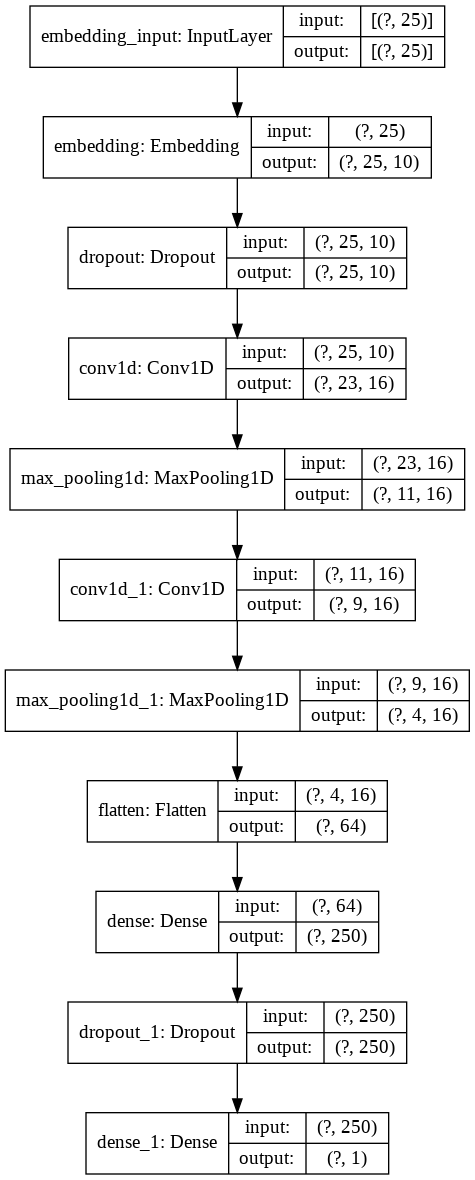

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [24]:
kf = KFold(n_splits=3, random_state=123, shuffle=True)

Pruebo valores diferentes para los parámetros

In [25]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.760047
Accuracy: 0.734831
Accuracy: 0.762318


In [26]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.3))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.784476
Accuracy: 0.759653
Accuracy: 0.804099


In [27]:
# Cambio el largo de los vectores para reducir overfitting
max_len = 15
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

In [28]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, 10, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=100, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.786052
Accuracy: 0.771474
Accuracy: 0.788727


In [29]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(vocab_size,100,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(128)(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1)(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs,outputs=layer)

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=100, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.741135
Accuracy: 0.726162
Accuracy: 0.757982


In [30]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(LSTM(64))
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.785264
Accuracy: 0.762805
Accuracy: 0.794639


In [31]:
callback = EarlyStopping(monitor = 'val_loss', patience = 4)

In [32]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Bidirectional(LSTM(max_len, return_sequences = True, recurrent_dropout=0.2)))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(LSTM(64))
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, callbacks = [callback], verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.738771
Accuracy: 0.758471
Accuracy: 0.778479


In [33]:
  model = Sequential()
  model.add(Embedding(vocab_size, 10, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(25, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(25, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(150, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(train_padded, y, batch_size=100, epochs=5)

Epoch 1/5
77/77 [==============================] - 1s 7ms/step - loss: 0.6954 - accuracy: 0.5467
Epoch 2/5
77/77 [==============================] - 1s 7ms/step - loss: 0.6675 - accuracy: 0.5936
Epoch 3/5
77/77 [==============================] - 1s 7ms/step - loss: 0.4952 - accuracy: 0.7839
Epoch 4/5
77/77 [==============================] - 1s 7ms/step - loss: 0.3845 - accuracy: 0.8400
Epoch 5/5
77/77 [==============================] - 1s 7ms/step - loss: 0.3305 - accuracy: 0.8652


Agrego al texto las keywords y los bigramas (si están en por lo menos dos textos)

In [40]:
def bigramas(texto):
  token = nltk.word_tokenize(texto)
  bigrams = ngrams(token,2)
  return list(bigrams)

In [41]:
bigramas_train = entrenamiento_df['cleaned_text'].agg(lambda x: bigramas(x))
bigramas_train

0       [(deed, reason), (reason, earthquak), (earthqu...
1       [(forest, fire), (fire, near), (near, la), (la...
2       [(resid, ask), (ask, shelter), (shelter, place...
3       [(13000, peopl), (peopl, receiv), (receiv, wil...
4       [(got, sent), (sent, photo), (photo, rubi), (r...
                              ...                        
7608    [(two, giant), (giant, crane), (crane, hold), ...
7609    [(ariaahrari, thetawniest), (thetawniest, cont...
7610    [(m194, 0104), (0104, utc5km), (utc5km, volcan...
7611    [(polic, investig), (investig, ebik), (ebik, c...
7612    [(latest, home), (home, raze), (raze, northern...
Name: cleaned_text, Length: 7613, dtype: object

In [42]:
bigramas_test = test_df['cleaned_text'].agg(lambda x: bigramas(x))
bigramas_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


0       [(happen, terribl), (terribl, car), (car, crash)]
1       [(heard, earthquak), (earthquak, differ), (dif...
2       [(forest, fire), (fire, spot), (spot, pond), (...
3       [(apocalyps, light), (light, spokan), (spokan,...
4       [(typhoon, soudelor), (soudelor, kill), (kill,...
                              ...                        
3258    [(earthquak, safeti), (safeti, lo), (lo, angel...
3259    [(storm, ri), (ri, wors), (wors, last), (last,...
3260    [(green, line), (line, derail), (derail, chica...
3261    [(meg, issu), (issu, hazard), (hazard, weather...
3262    [(cityofcalgari, activ), (activ, municip), (mu...
Name: cleaned_text, Length: 3263, dtype: object

In [43]:
dic_bigramas = {}


In [47]:
vectorizer2 = CountVectorizer(ngram_range=(2, 2), min_df=2)
vectorizer2.fit_transform(entrenamiento_df['cleaned_text'].append(test_df['cleaned_text']))
len(vectorizer2.get_feature_names())

8337

In [48]:
vectorizer2.get_feature_names()[:10]

['001116 utc20150805',
 '005225 utc20150805',
 '0104 utc5km',
 '010401 utc20150805',
 '02 03',
 '02 scene',
 '05 1038pm',
 '05 1040pm',
 '05 915pm',
 '05 curfew']

In [49]:
ngrams2 = vectorizer2.get_feature_names()

In [50]:
keywords_train = entrenamiento_df['keyword'].fillna('None')
keywords_test = test_df['keyword'].fillna('None')

In [51]:
textos_train = pd.Series()
textos_test = pd.Series()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [52]:
for i in range(0, len(entrenamiento_df)):
  texto = entrenamiento_df['cleaned_text'][i]
  for b in bigramas_train[i]:
    bgrm = b[0]+' '+b[1]
    if bgrm in ngrams2:
      texto += ' ' + b[0] + b[1]
  texto += ' ' + keywords_train[i]
  textos_train[str(i)] = texto

In [53]:
textos_train

0       deed reason earthquak may allah forgiv us maya...
1       forest fire near la rong sask canada forestfir...
2       resid ask shelter place notifi offic evacu she...
3       13000 peopl receiv wildfir evacu order califor...
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    ariaahrari thetawniest control wild fire calif...
7610    m194 0104 utc5km volcano hawaii  m1940104 0104...
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Length: 7613, dtype: object

In [54]:
for i in range(0, len(test_df)):
  texto = test_df['cleaned_text'][i]
  for b in bigramas_test[i]:
    bgrm = b[0]+' '+b[1]
    if bgrm in ngrams2:
      texto += ' ' + b[0] + b[1]
  texto += ' ' + keywords_test[i]
  textos_test[str(i)] = texto

In [55]:
textos_test

0                  happen terribl car crash carcrash None
1       heard earthquak differ citi stay safe everyon ...
2       forest fire spot pond gees flee across street ...
3                     apocalyps light spokan wildfir None
4       typhoon soudelor kill 28 china taiwan typhoons...
                              ...                        
3258    earthquak safeti lo angel ûò safeti fasten xrw...
3259    storm ri wors last hurrican cityamp3oth hardes...
3260    green line derail chicago  greenline linederai...
3261    meg issu hazard weather outlook hwo  megissu i...
3262    cityofcalgari activ municip emerg plan yycstor...
Length: 3263, dtype: object

In [56]:
vocab_size = len(dic_palabras) + len(ngrams2) + len(keywords_train.value_counts()) + len(keywords_test.value_counts()) + 1
vocab_size

27268

In [57]:
train_encoded = [one_hot(texto, vocab_size) for texto in textos_train]
test_encoded = [one_hot(texto, vocab_size) for texto in textos_test]

In [59]:
max_len = 1
for texto in textos_train:
  if (max_len < len(texto.split())):
    max_len = len(texto.split())
max_len

38

In [60]:
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

In [61]:
batch_size = 100
embedding_dims = 10
filters = 16
kernel_size = 3
hidden_dims = 250
epochs = 10

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.fit(train_padded, y, batch_size=batch_size, epochs=epochs)

Epoch 1/10
77/77 [==============================] - 1s 13ms/step - loss: 0.6644 - accuracy: 0.5929
Epoch 2/10
77/77 [==============================] - 1s 13ms/step - loss: 0.5097 - accuracy: 0.7651
Epoch 3/10
77/77 [==============================] - 1s 13ms/step - loss: 0.3702 - accuracy: 0.8440
Epoch 4/10
77/77 [==============================] - 1s 15ms/step - loss: 0.3013 - accuracy: 0.8811
Epoch 5/10
77/77 [==============================] - 1s 14ms/step - loss: 0.2523 - accuracy: 0.9048
Epoch 6/10
77/77 [==============================] - 1s 13ms/step - loss: 0.2154 - accuracy: 0.9192
Epoch 7/10
77/77 [==============================] - 1s 12ms/step - loss: 0.1876 - accuracy: 0.9300
Epoch 8/10
77/77 [==============================] - 1s 12ms/step - loss: 0.1645 - accuracy: 0.9389
Epoch 9/10
77/77 [==============================] - 1s 12ms/step - loss: 0.1507 - accuracy: 0.9476
Epoch 10/10
77/77 [==============================] - 1s 12ms/step - loss: 0.1310 - accuracy: 0.9531


In [66]:
kf = KFold(n_splits=3, random_state=123, shuffle=True)

Pruebo diferentes parámetros

In [67]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(LSTM(64))
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.792356
Accuracy: 0.777384
Accuracy: 0.799764


In [68]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
model.add(MaxPooling1D())
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(train_padded, y, batch_size=100, epochs=5)

Epoch 1/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6850 - accuracy: 0.5684
Epoch 2/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6847 - accuracy: 0.5688
Epoch 3/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6579 - accuracy: 0.6099
Epoch 4/5
77/77 [==============================] - 1s 18ms/step - loss: 0.4338 - accuracy: 0.8130
Epoch 5/5
77/77 [==============================] - 1s 19ms/step - loss: 0.3512 - accuracy: 0.8554


Agrego al texto las locations y los trigramas que están en dos textos por lo menos

In [71]:
def trigramas(texto):
  token = nltk.word_tokenize(texto)
  trigrams = ngrams(token,3)
  return list(trigrams)

In [72]:
trigramas_train = entrenamiento_df['cleaned_text'].agg(lambda x: trigramas(x))
trigramas_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


0       [(deed, reason, earthquak), (reason, earthquak...
1       [(forest, fire, near), (fire, near, la), (near...
2       [(resid, ask, shelter), (ask, shelter, place),...
3       [(13000, peopl, receiv), (peopl, receiv, wildf...
4       [(got, sent, photo), (sent, photo, rubi), (pho...
                              ...                        
7608    [(two, giant, crane), (giant, crane, hold), (c...
7609    [(ariaahrari, thetawniest, control), (thetawni...
7610    [(m194, 0104, utc5km), (0104, utc5km, volcano)...
7611    [(polic, investig, ebik), (investig, ebik, col...
7612    [(latest, home, raze), (home, raze, northern),...
Name: cleaned_text, Length: 7613, dtype: object

In [73]:
trigramas_test = test_df['cleaned_text'].agg(lambda x: trigramas(x))
trigramas_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


0         [(happen, terribl, car), (terribl, car, crash)]
1       [(heard, earthquak, differ), (earthquak, diffe...
2       [(forest, fire, spot), (fire, spot, pond), (sp...
3       [(apocalyps, light, spokan), (light, spokan, w...
4       [(typhoon, soudelor, kill), (soudelor, kill, 2...
                              ...                        
3258    [(earthquak, safeti, lo), (safeti, lo, angel),...
3259    [(storm, ri, wors), (ri, wors, last), (wors, l...
3260     [(green, line, derail), (line, derail, chicago)]
3261    [(meg, issu, hazard), (issu, hazard, weather),...
3262    [(cityofcalgari, activ, municip), (activ, muni...
Name: cleaned_text, Length: 3263, dtype: object

In [74]:
dic_trigramas = {}


In [75]:
vectorizer3 = CountVectorizer(ngram_range=(3, 3), min_df=2)
vectorizer3.fit_transform(entrenamiento_df['cleaned_text'].append(test_df['cleaned_text']))
len(vectorizer3.get_feature_names())

5374

In [76]:
vectorizer3.get_feature_names()[:10]

['001116 utc20150805 161116',
 '005225 utc20150805 175225',
 '0104 utc5km volcano',
 '010401 utc20150805 150401',
 '02 scene pandemonium',
 '05 1038pm edt',
 '05 1040pm edt',
 '05 915pm cdt',
 '05 curfew oper',
 '05th 2029 mdt']

In [77]:
ngrams3 = vectorizer3.get_feature_names()

In [100]:
for i in range(0, len(textos_train)):
  texto = textos_train[i]
  for t in trigramas_train[i]:
    tgrm = t[0]+' '+t[1]+' '+t[2]
    if tgrm in ngrams3:
      texto += ' ' + t[0] + t[1] + t[2]
  textos_train[i] = texto

In [101]:
textos_train

0       deed reason earthquak may allah forgiv us maya...
1       forest fire near la rong sask canada forestfir...
2       resid ask shelter place notifi offic evacu she...
3       13000 peopl receiv wildfir evacu order califor...
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    ariaahrari thetawniest control wild fire calif...
7610    m194 0104 utc5km volcano hawaii  m1940104 0104...
7611    polic investig ebik collid car littl portug eb...
7612    latest home raze northern california wildfir a...
Length: 7613, dtype: object

In [103]:
for i in range(0, len(test_df)):
  texto = textos_test[i]
  for t in trigramas_test[i]:
    tgrm = t[0]+' '+t[1]+' '+t[2]
    if tgrm in ngrams3:
      texto += ' ' + t[0] + t[1] + t[2]
  textos_test[i] = texto

In [104]:
textos_test

0                  happen terribl car crash carcrash None
1       heard earthquak differ citi stay safe everyon ...
2       forest fire spot pond gees flee across street ...
3                     apocalyps light spokan wildfir None
4       typhoon soudelor kill 28 china taiwan typhoons...
                              ...                        
3258    earthquak safeti lo angel ûò safeti fasten xrw...
3259    storm ri wors last hurrican cityamp3oth hardes...
3260    green line derail chicago  greenline linederai...
3261    meg issu hazard weather outlook hwo  megissu i...
3262    cityofcalgari activ municip emerg plan yycstor...
Length: 3263, dtype: object

In [105]:
vocab_size += len(ngrams3)
vocab_size

32642

In [160]:
textos_train.agg(lambda x: len(x.split(' '))).value_counts()

13    477
12    465
14    454
11    447
15    444
10    431
16    389
17    385
9     354
8     319
7     286
18    268
6     257
20    235
5     213
19    205
23    167
21    156
4     145
26    119
32    109
29    108
24    108
22     95
27     90
3      85
28     78
31     73
36     68
33     67
25     67
34     63
37     55
30     50
38     48
35     45
40     31
39     28
42     26
43     16
41     16
2      15
44     14
48     11
45      9
47      7
51      6
46      5
49      4
dtype: int64

In [121]:
textos_test.agg(lambda x: len(x.split(' '))).value_counts()

14    213
13    201
11    200
15    199
12    190
17    176
10    170
9     154
16    151
8     128
7     120
18    114
6     104
19     97
20     96
5      78
21     70
4      65
23     62
26     52
32     47
22     46
3      42
27     42
29     40
24     33
37     31
33     30
35     30
28     29
38     28
36     27
25     26
30     24
31     24
34     20
43     20
39     16
42     15
2      12
40     10
41      7
44      6
51      6
49      3
47      3
46      2
48      2
45      2
dtype: int64

In [161]:
train_encoded = [one_hot(texto, vocab_size) for texto in textos_train]
test_encoded = [one_hot(texto, vocab_size) for texto in textos_test]

In [151]:
max_len = 40

In [162]:
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

In [110]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model.fit(train_padded, y, batch_size=batch_size, epochs=epochs)

Epoch 1/10
77/77 [==============================] - 1s 13ms/step - loss: 0.6613 - accuracy: 0.6044
Epoch 2/10
77/77 [==============================] - 1s 14ms/step - loss: 0.5116 - accuracy: 0.7542
Epoch 3/10
77/77 [==============================] - 1s 14ms/step - loss: 0.3782 - accuracy: 0.8397
Epoch 4/10
77/77 [==============================] - 1s 14ms/step - loss: 0.3102 - accuracy: 0.8744
Epoch 5/10
77/77 [==============================] - 1s 14ms/step - loss: 0.2596 - accuracy: 0.8979
Epoch 6/10
77/77 [==============================] - 1s 14ms/step - loss: 0.2203 - accuracy: 0.9145
Epoch 7/10
77/77 [==============================] - 1s 14ms/step - loss: 0.1891 - accuracy: 0.9289
Epoch 8/10
77/77 [==============================] - 1s 14ms/step - loss: 0.1655 - accuracy: 0.9367
Epoch 9/10
77/77 [==============================] - 1s 14ms/step - loss: 0.1472 - accuracy: 0.9455
Epoch 10/10
77/77 [==============================] - 1s 14ms/step - loss: 0.1332 - accuracy: 0.9496


In [163]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(LSTM(64))
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.795902
Accuracy: 0.775808
Accuracy: 0.775325


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
model.add(MaxPooling1D())
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_padded, y, batch_size=100, epochs=5)

Epoch 1/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6850 - accuracy: 0.5684
Epoch 2/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6847 - accuracy: 0.5688
Epoch 3/5
77/77 [==============================] - 1s 19ms/step - loss: 0.6579 - accuracy: 0.6099
Epoch 4/5
77/77 [==============================] - 1s 18ms/step - loss: 0.4338 - accuracy: 0.8130
Epoch 5/5
77/77 [==============================] - 1s 19ms/step - loss: 0.3512 - accuracy: 0.8554


In [164]:
location_train = entrenamiento_df['location'].fillna('None')
location_test = test_df['location'].fillna('None')

In [167]:
train2 = pd.Series()
for i in range(0, len(entrenamiento_df)):
  texto = location_train[i]
  texto += ' ' + textos_train[i]
  train2[str(i)] = texto

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [168]:
test2 = pd.Series()
for i in range(0, len(test_df)):
  texto = location_test[i]
  texto += ' ' + textos_test[i]
  test2[str(i)] = texto

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [170]:
vocab_size += len(entrenamiento_df['location'].append(test_df['location']).value_counts())
vocab_size

37162

In [171]:
train_encoded = [one_hot(texto, vocab_size) for texto in train2]
test_encoded = [one_hot(texto, vocab_size) for texto in test2]

In [172]:
max_len = 40

In [173]:
train_padded = pad_sequences(train_encoded, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_encoded, maxlen=max_len, padding='post')

Pruebo con distintos parámetros

In [ ]:
kf = KFold(n_splits=3, random_state=123, shuffle=True)

In [174]:
for train_index, test_index in kf.split(train_padded):
  X_train, X_test = train_padded[train_index], train_padded[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
  model.add(MaxPooling1D())
  model.add(LSTM(64))
  model.add(Flatten())
  model.add(Dense(hidden_dims, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy: %f' % (accuracy))

Accuracy: 0.798266
Accuracy: 0.776202
Accuracy: 0.804493


In [215]:
for batch_size in [60, 70, 80, 90, 100, 110]:
  print('Batch size: %i' %(batch_size))
  for train_index, test_index in kf.split(train_padded):
    X_train, X_test = train_padded[train_index], train_padded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
    model.add(MaxPooling1D())
    model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %f' % (accuracy))

Batch size: 60
Accuracy: 0.806541
Accuracy: 0.767533
Accuracy: 0.791880
Batch size: 70
Accuracy: 0.799054
Accuracy: 0.770292
Accuracy: 0.791092
Batch size: 80
Accuracy: 0.793144
Accuracy: 0.758865
Accuracy: 0.800552
Batch size: 90
Accuracy: 0.802206
Accuracy: 0.784870
Accuracy: 0.800946
Batch size: 100
Accuracy: 0.800630
Accuracy: 0.778960
Accuracy: 0.802523
Batch size: 110
Accuracy: 0.797872
Accuracy: 0.785658
Accuracy: 0.804493


In [224]:
batch_size = 90

In [181]:
for hidden_dims in [150, 200, 250, 300]:
  print('Hidden dims: %i' % (hidden_dims))
  for train_index, test_index in kf.split(train_padded):
    X_train, X_test = train_padded[train_index], train_padded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
    model.add(MaxPooling1D())
    model.add(LSTM(64))
    model.add(Flatten())
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %f' % (accuracy))

Hidden dims: 150
Accuracy: 0.789204
Accuracy: 0.777778
Accuracy: 0.790304
Hidden dims: 200
Accuracy: 0.768716
Accuracy: 0.778172
Accuracy: 0.777690
Hidden dims: 250
Accuracy: 0.800630
Accuracy: 0.773444
Accuracy: 0.800158
Hidden dims: 300
Accuracy: 0.786446
Accuracy: 0.770686
Accuracy: 0.797399


In [183]:
hidden_dims = 250

In [204]:
for epochs in [3, 4, 5, 6, 7]:
  print('Epochs: %i' % (epochs))
  for train_index, test_index in kf.split(train_padded):
    X_train, X_test = train_padded[train_index], train_padded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, 2, padding='valid', activation='softmax'))
    model.add(Bidirectional(LSTM(64)))
    model.add(Flatten())
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %f' % (accuracy))

Epochs: 3
Accuracy: 0.770686
Accuracy: 0.705280
Accuracy: 0.756799
Epochs: 4
Accuracy: 0.790780
Accuracy: 0.780536
Accuracy: 0.795822
Epochs: 5
Accuracy: 0.784476
Accuracy: 0.780536
Accuracy: 0.797004
Epochs: 6
Accuracy: 0.790780
Accuracy: 0.775020
Accuracy: 0.789121
Epochs: 7
Accuracy: 0.782900
Accuracy: 0.773050
Accuracy: 0.783997


In [206]:
for p in [2,3,4,5,6]:
  print('Patience: %i' % (p))
  for train_index, test_index in kf.split(train_padded):
    X_train, X_test = train_padded[train_index], train_padded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dims, input_length=max_len))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, 2, padding='valid', activation='softmax'))
    model.add(Bidirectional(LSTM(64)))
    model.add(Flatten())
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    callback = EarlyStopping(monitor = 'loss', patience = 3)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks = [callback], verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %f' % (accuracy))

Patience: 2
Accuracy: 0.761623
Accuracy: 0.765169
Accuracy: 0.769807
Patience: 3
Accuracy: 0.778960
Accuracy: 0.760835
Accuracy: 0.768230
Patience: 4
Accuracy: 0.758077
Accuracy: 0.766745
Accuracy: 0.757588
Patience: 5
Accuracy: 0.774232
Accuracy: 0.754531
Accuracy: 0.763500
Patience: 6
Accuracy: 0.769898
Accuracy: 0.752561
Accuracy: 0.767048


In [246]:
for m in [15,20,25,30,40]:
  print('Max_len: %i' % (m))
  for train_index, test_index in kf.split(train_padded):
    X_train, X_test = train_padded[train_index], train_padded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=m))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters, 2, padding='valid', activation='softmax'))
    model.add(Bidirectional(LSTM(64)))
    model.add(Flatten())
    model.add(Dense(hidden_dims, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %f' % (accuracy))

Max_len: 15
Accuracy: 0.802600
Accuracy: 0.784082
Accuracy: 0.802523
Max_len: 20
Accuracy: 0.780536
Accuracy: 0.764775
Accuracy: 0.795034
Max_len: 25
Accuracy: 0.800236
Accuracy: 0.786052
Accuracy: 0.805282
Max_len: 30
Accuracy: 0.805359
Accuracy: 0.755319
Accuracy: 0.808041
Max_len: 40
Accuracy: 0.793144
Accuracy: 0.784870
Accuracy: 0.800946


In [256]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=30))
model.add(Dropout(0.5))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, padding='valid', activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, 2, padding='valid', activation='softmax'))
model.add(Bidirectional(LSTM(64)))
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [257]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_padded, y, batch_size=90, epochs=5, verbose=1)

Epoch 1/5
85/85 [==============================] - 2s 23ms/step - loss: 0.6849 - accuracy: 0.5689
Epoch 2/5
85/85 [==============================] - 2s 23ms/step - loss: 0.6590 - accuracy: 0.5950
Epoch 3/5
85/85 [==============================] - 2s 22ms/step - loss: 0.4422 - accuracy: 0.8055
Epoch 4/5
85/85 [==============================] - 2s 23ms/step - loss: 0.3431 - accuracy: 0.8591
Epoch 5/5
85/85 [==============================] - 2s 23ms/step - loss: 0.2751 - accuracy: 0.8975


In [250]:
preds = model.predict_classes(test_padded)

In [251]:
preds

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [252]:
predictions = preds.reshape(3263)

In [253]:
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [254]:
target = pd.DataFrame({'id':test_df['id'], 'target':predictions})
target.to_csv('submit_sequential_embedding.csv', index=False)

In [255]:
target

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1
